### Problem 1
Consider Ackley Function [link](https://en.wikipedia.org/wiki/Ackley_function) on the interval $[-5; 5] \times [-5; 5]$:
$$f(x,y) = -20\exp\left[-0.2\sqrt{0.5(x^2+y^2)}\right] -\exp\left[0.5(\cos 2\pi x + \cos 2\pi y))\right] + e + 20$$
Find the global minimum value of this function using Simulated Annealing algorithm with Gaussian state change (finding next point by adding Gaussian random values). Plot the progressive steps on the contour map of the function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline

In [6]:
A, B = -5, 5
def f(x,y):
    return -20*np.exp(-0.2*np.sqrt(0.5*(x**2+y**2))) - np.exp(0.5*(np.cos(2*np.pi*x)+np.cos(2*np.pi*y))) + np.exp(1) + 20

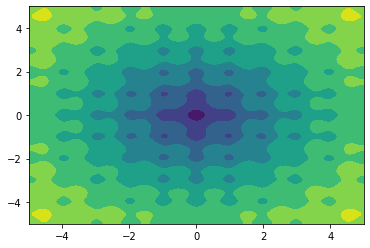

In [8]:
x_base = np.linspace(A,B, 100)
y_base = np.linspace(A,B, 100)
xx, yy = np.meshgrid(x_base, y_base, sparse=True)
zz = f(xx, yy)
plt.contourf(x_base,y_base,zz)
plt.show()

In [33]:
np.random.seed(0)

sigma = 0.5
p0 = np.random.random(size=2)*(B-A) + A

dp = np.random.normal(loc=0.0, scale=sigma, size=2)

p1 = p0+dp

print(f(p0[0], p0[1]) - f(p1[0], p1[1]))
T0 = - (np.abs(f(p0[0], p0[1]) - f(p1[0], p1[1])))/np.log(0.5)
print(T0)

-1.581306202548511
2.2813426165436956


In [34]:
T = T0/2
p = p0

factor = 0.5

p_hist = []

while T>0.0001:
    for i in range(1000):
        dp = np.random.normal(loc=0.0, scale=sigma, size=2)
        p1 = p+dp
        fp = f(p[0], p[1])
        fp1 = f(p1[0], p1[1])
        if fp1 < fp:
            p = p1
            p_hist.append(p)
        else:
            prob = np.exp(-(fp1 - fp)/T)
            if np.random.random() < prob:
                p = p1
                p_hist.append(p)
    T *= factor
    sigma *= factor
    
print(p)
print(f(p[0], p[1]))

[-9.85164680e-06 -3.07563752e-05]
9.137369019640573e-05


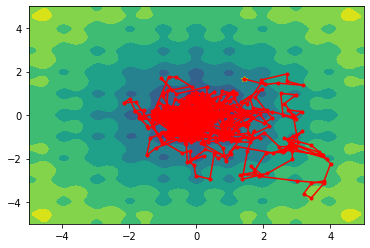

In [35]:
p_hist = np.array(p_hist)
x_base = np.linspace(A,B, 100)
y_base = np.linspace(A,B, 100)
xx, yy = np.meshgrid(x_base, y_base, sparse=True)
zz = f(xx, yy)
plt.contourf(x_base,y_base,zz)
plt.plot(p_hist[0,0], p_hist[0,1], 'y*', p_hist[-1,0], p_hist[-1,1], 'ko')
plt.plot(p_hist[:,0], p_hist[:,1], 'r.-')
plt.show()

### Problem 2
Consider Rastrigin Function [link](https://en.wikipedia.org/wiki/Rastrigin_function) on the interval $[-5.12; 5.12] \times [-5.12; 5.12]$:
$$f(x,y) = 20 + (x^2 - 10\cos2\pi x) + (y^2 - 10\cos2\pi y)$$
Find the global minimum value of this function using Particle Swarm Optimization with $N$ particles. Try various values of $N$. Plot the progressive steps on the contour map of the function.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline

In [39]:
A, B = -5.12, 5.12
def f(x, y):
    return 20 + (x**2 - 10*np.cos(2*np.pi*x)) + (y**2 - 10*np.cos(2*np.pi*y))

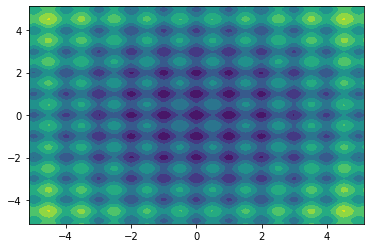

In [40]:
x_base = np.linspace(A,B, 100)
y_base = np.linspace(A,B, 100)
xx, yy = np.meshgrid(x_base, y_base, sparse=True)
zz = f(xx, yy)
plt.contourf(x_base,y_base,zz)
plt.show()

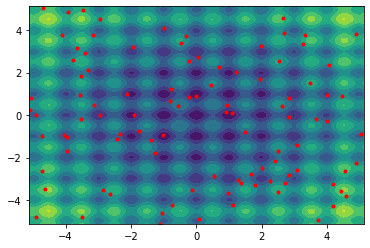

In [52]:
p = np.random.uniform(A, B, size=(100, 2))
v = np.random.uniform(0, 1, size=(100, 2))

p_best = p

f0 = f(p[:,0], p[:,1])
i_best = np.argmin(f0)
g_best = p[i_best,:]

x_base = np.linspace(A,B, 100)
y_base = np.linspace(A,B, 100)
xx, yy = np.meshgrid(x_base, y_base, sparse=True)
zz = f(xx, yy)
plt.contourf(x_base,y_base,zz)
plt.plot(p[:,0], p[:,1], 'r.')
plt.show()

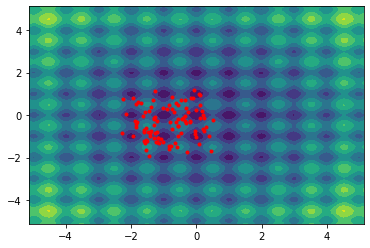

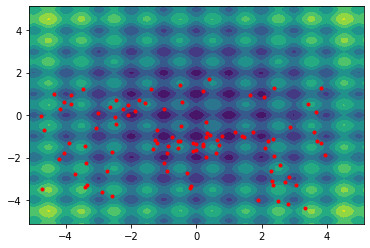

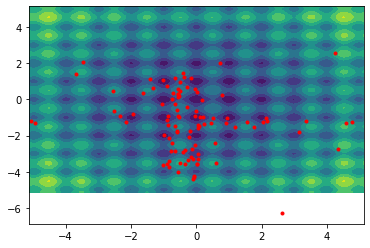

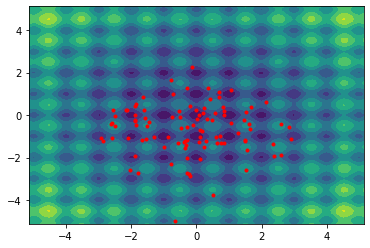

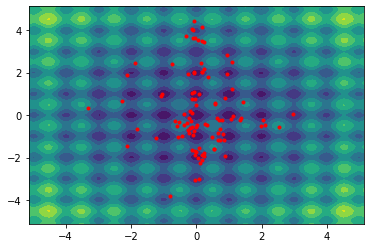

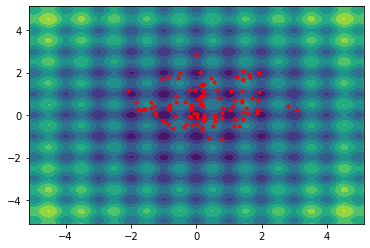

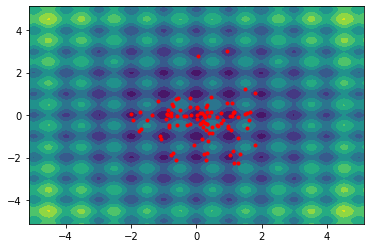

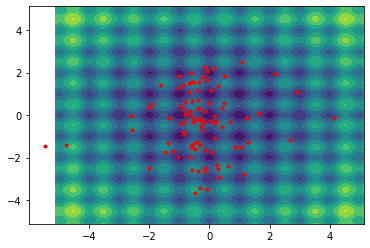

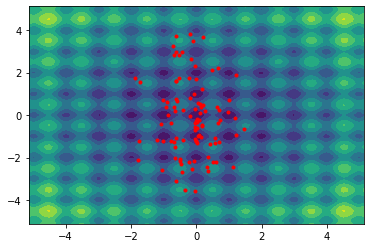

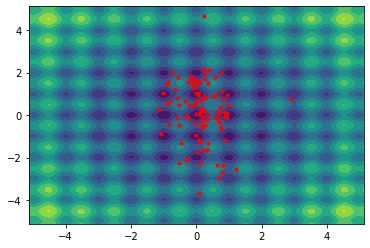

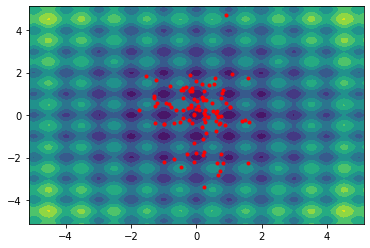

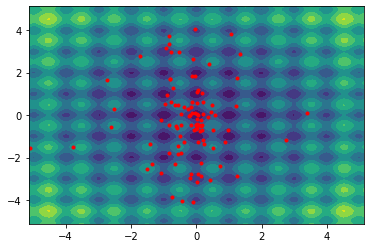

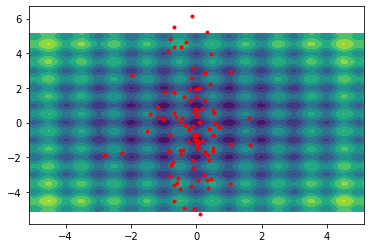

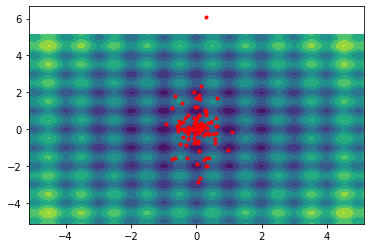

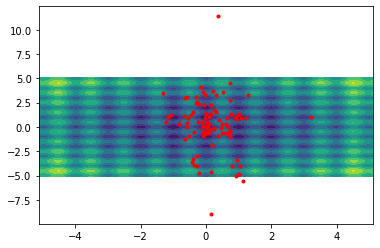

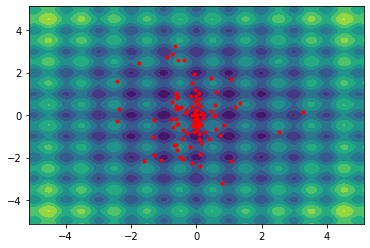

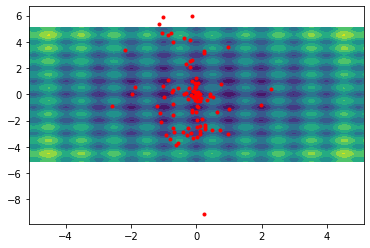

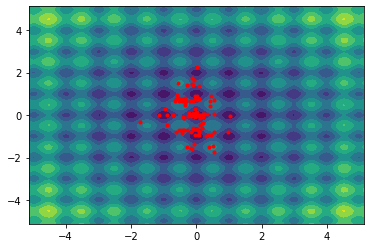

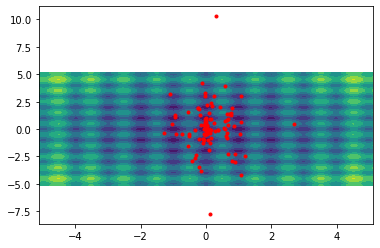

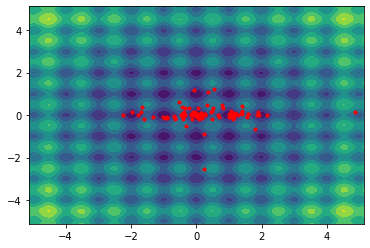

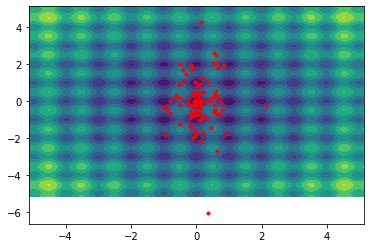

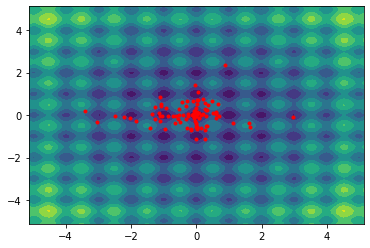

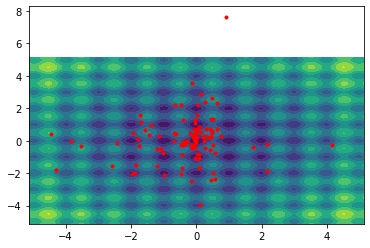

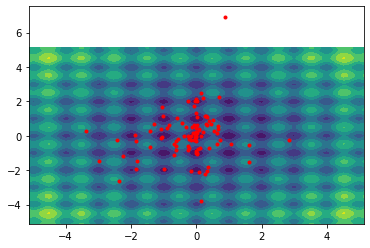

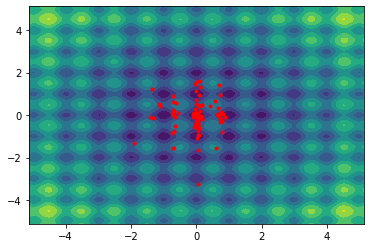

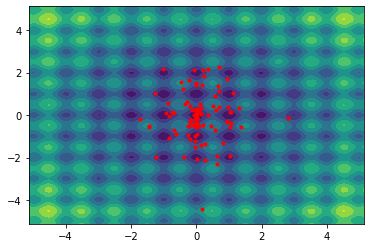

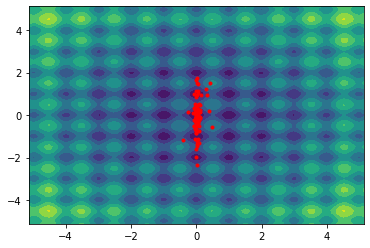

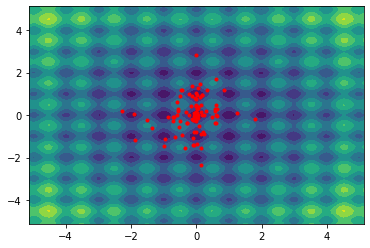

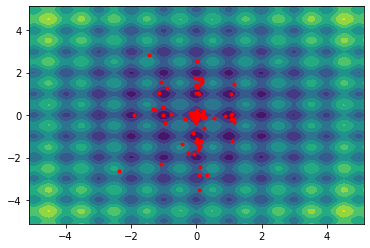

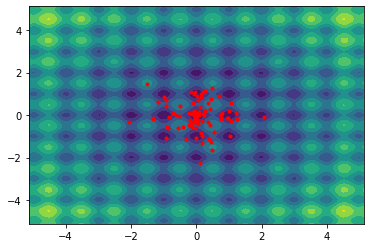

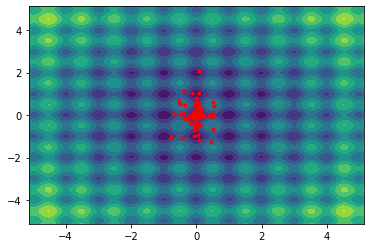

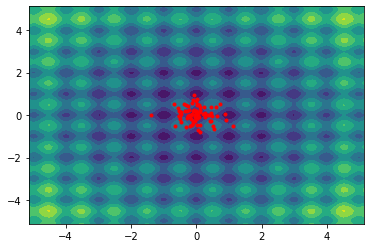

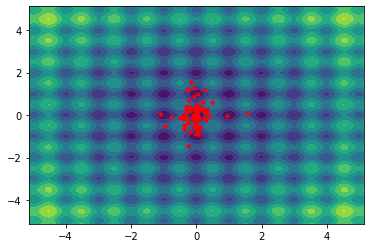

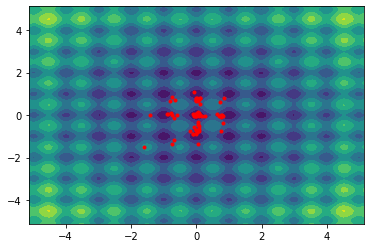

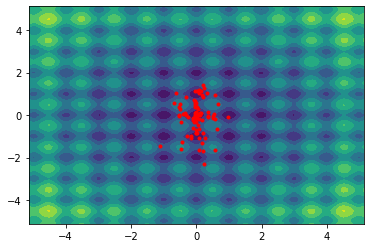

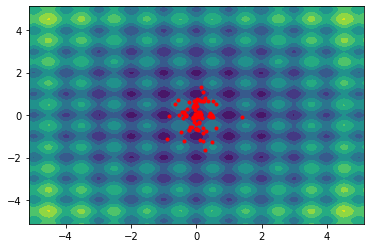

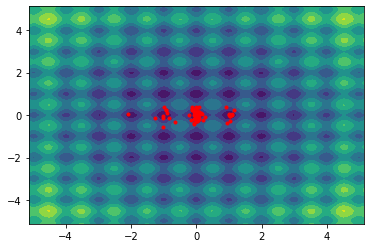

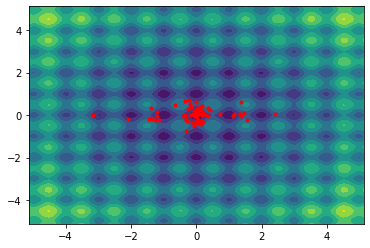

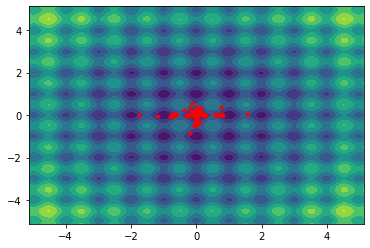

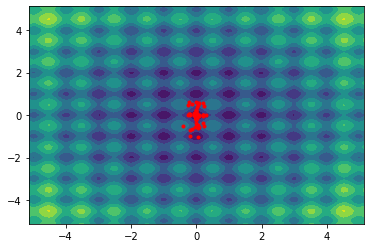

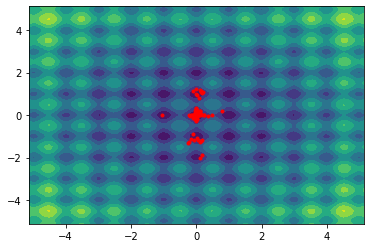

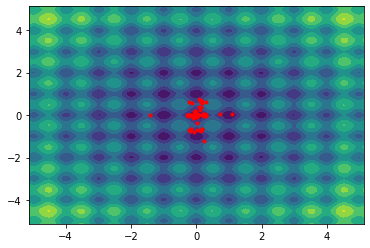

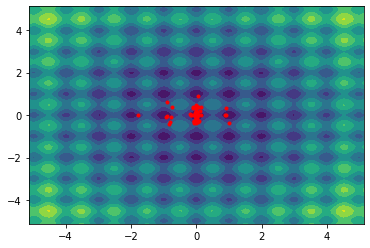

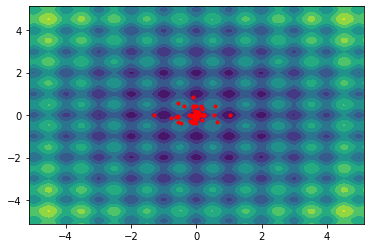

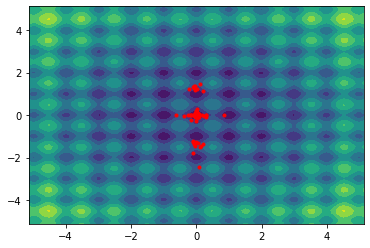

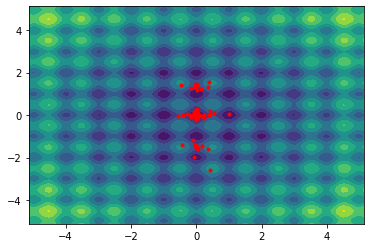

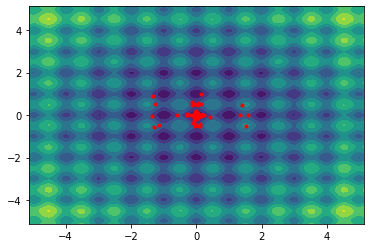

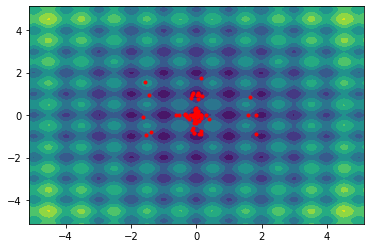

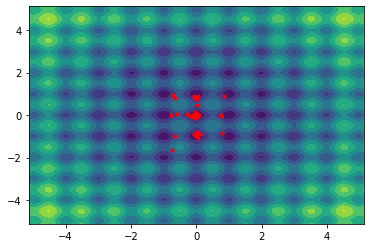

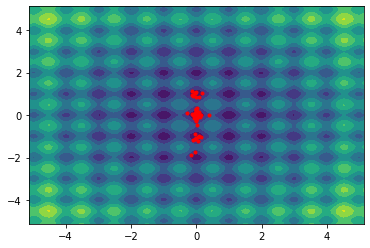

In [53]:
omega = 0.7298 
phi = 1.49618

f_best = f(p_best[:,0], p_best[:,1])

for i in range(50):
    d_best = p_best - p
    d_group = g_best - p
    v = omega*v + np.random.uniform(0, phi, size=2)*d_best + np.random.uniform(0, phi, size=2)*d_group
    p = p + v
    f_new = f(p[:,0], p[:,1])
    p_best[f_new<f_best, :] = p[f_new<f_best, :]
    
    f_best = f(p_best[:,0], p_best[:,1])
    
    i_best = np.argmin(f_best)
    g_best = p_best[i_best,:]
    
    x_base = np.linspace(A,B, 100)
    y_base = np.linspace(A,B, 100)
    xx, yy = np.meshgrid(x_base, y_base, sparse=True)
    zz = f(xx, yy)
    plt.contourf(x_base,y_base,zz)
    plt.plot(p[:,0], p[:,1], 'r.')
    plt.show()

### Problem 3
Consider Ackley or Rastrigin Function from previous problems. Find the global minimum value of this function using following methods:
 - Constricted Coefficients PSO
 - 

Try various values of $N$. Plot the progressive steps on the contour map of the function.